In [1]:
import numpy as np 
import numpy.typing as npt 
import pandas as pd 

from tqdm.notebook import tqdm

from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report

from scipy.spatial import distance
from scipy.stats import mode

from math import sqrt, floor

from recognizer.misc import load_datasets
from recognizer.preprocessing import resample_dataset
from recognizer.cross_validation import user_independent_cross_validation, user_dependent_cross_validation, test_algo
from recognizer.plot import plot_sketch, plot_confusion_matrix, plot_multiple_confusion_matrix

from recognizer.knn import KNN
from recognizer.point_cloud import PointCloudRecognizer

### Load datasets

In [2]:
X1, y1, hand_gesture_data_matrix1 = load_datasets(domain="Domain01")
X3, y3, hand_gesture_data_matrix3 = load_datasets(domain="Domain03")

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


  0%|          | 0/1000 [00:00<?, ?it/s]

/Users/mathieu/Lab/linfo2275-hand-gesture-recognition/recognizer/misc.py:39: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.asarray(X), np.asarray(Y), hand_gesture_data_matrix


  0%|          | 0/1000 [00:00<?, ?it/s]

### Dynamic Time Warping

In [3]:
knn = KNN(n_neighbors=1, radius=1, metric="fast_dtw")

In [13]:
dtw_accuracy_mean_d1_uindep, dtw_accuracy_std_d1_uindep, dtw_y_preds_d1_uindep, dtw_y_tests_d1_uindep = user_independent_cross_validation(
	estimator=knn, 
	X=resample_dataset(X1), 
	y=y1
)

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

In [14]:
print("DOMAIN 01 - DYNAMIC TIME WARPING")

print("USER INDEPENDENT CROSS VALIDATION")
print(f"mean accuracy: {np.round(dtw_accuracy_mean_d1_uindep, 3)}")
print(f"std accuracy: {np.round(dtw_accuracy_std_d1_uindep, 3)}")

DOMAIN 01 - DYNAMIC TIME WARPING
USER INDEPENDENT CROSS VALIDATION
mean accuracy: 0.743
std accuracy: 0.146


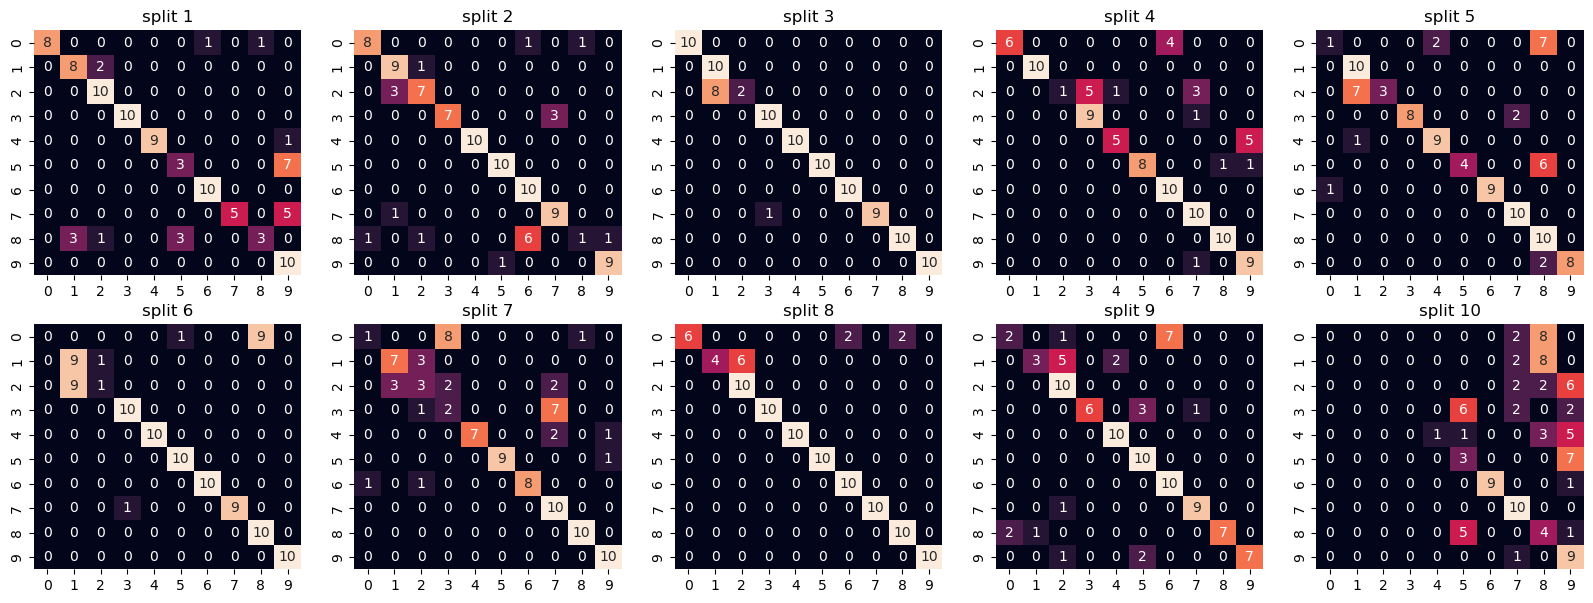

In [17]:
plot_multiple_confusion_matrix(y_trues=dtw_y_tests_d1_uindep, y_preds=dtw_y_preds_d1_uindep)

In [4]:
dtw_accuracy_mean_d1_udep, dtw_accuracy_std_d1_udep, dtw_y_preds_d1_udep, dtw_y_tests_d1_udep = user_dependent_cross_validation(
	estimator=knn, 
	X=resample_dataset(X1), 
	y=y1
)

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

DOMAIN 01 - DYNAMIC TIME WARPING
USER DEPENDENT CROSS VALIDATION


NameError: name 'dtw_accuracy_mean_d1_' is not defined

In [5]:
print("DOMAIN 01 - DYNAMIC TIME WARPING")

print("USER DEPENDENT CROSS VALIDATION")
print(f"mean accuracy: {np.round(dtw_accuracy_mean_d1_udep, 3)}")
print(f"std accuracy: {np.round(dtw_accuracy_std_d1_udep, 3)}")

DOMAIN 01 - DYNAMIC TIME WARPING
USER DEPENDENT CROSS VALIDATION
mean accuracy: 0.99
std accuracy: 0.009


In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_true, y_pred, i, ax = None):
	if ax is None:
		fig, ax = plt.subplots()
	else:
		fig = ax.figure

	conf_matrix = np.array(confusion_matrix(y_true=y_true, y_pred=y_pred))
	sns.heatmap(conf_matrix, annot=True, cbar=False, ax=ax)
	ax.set_title(f"split {i}")

def plot_multiple_confusion_matrix(y_trues, y_preds):
	if len(y_trues) != len(y_preds):
		raise ValueError("y_trues and y_preds should be of same length.")

	n = len(y_trues)
	fix, axes = plt.subplots(nrows = 2, ncols = 5, figsize=(20, 7))

	for i in range(0, n):
		plot_confusion_matrix(y_true=y_trues[i], y_pred=y_preds[i], i=i+1, ax=axes.flatten()[i])

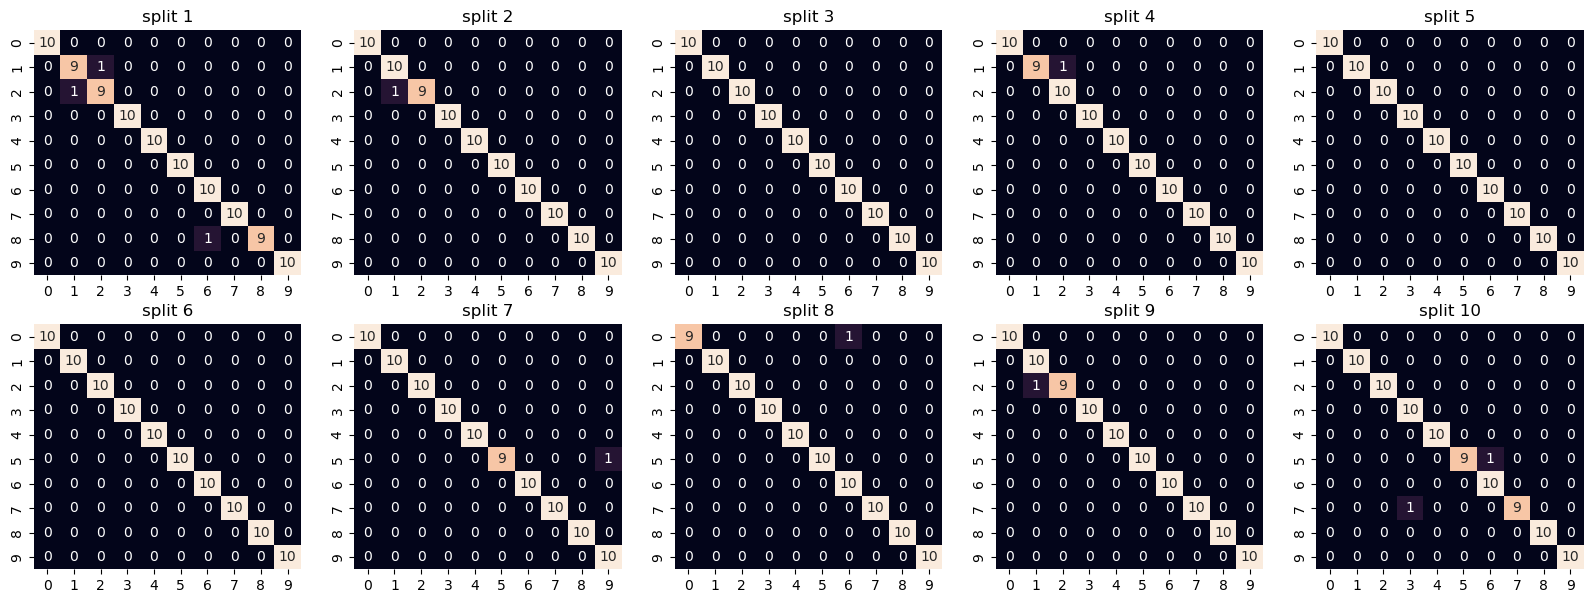

In [18]:
plot_multiple_confusion_matrix(y_trues=dtw_y_tests_d1_udep, y_preds=dtw_y_preds_d1_udep)

In [ ]:
dtw_accuracy_mean_d3_uindep, dtw_accuracy_std_d3_uindep, dtw_y_preds_d3_uindep, dtw_y_tests_d3_uindep = user_independent_cross_validation(
	estimator=knn, 
	X=resample_dataset(X3), 
	y=y3
)

In [ ]:
print("DOMAIN 03 - DYNAMIC TIME WARPING")

print("USER INDEPENDENT CROSS VALIDATION")
print(f"mean accuracy: {np.round(dtw_accuracy_mean_d3_uindep, 3)}")
print(f"std accuracy: {np.round(dtw_accuracy_std_d3_uindep, 3)}")

In [ ]:
plot_multiple_confusion_matrix(y_trues=dtw_y_tests_d3_uindep, y_preds=dtw_y_preds_d3_uindep)

In [ ]:
dtw_accuracy_mean_d3_udep, dtw_accuracy_std_d3_udep, dtw_y_preds_d3_udep, dtw_y_tests_d3_udep = user_independent_cross_validation(
	estimator=knn, 
	X=resample_dataset(X3), 
	y=y3
)

In [ ]:
print("DOMAIN 03 - DYNAMIC TIME WARPING")

print("USER DEPENDENT CROSS VALIDATION")
print(f"mean accuracy: {np.round(dtw_accuracy_mean_d3_udep, 3)}")
print(f"std accuracy: {np.round(dtw_accuracy_std_d3_udep, 3)}")

In [ ]:
plot_multiple_confusion_matrix(y_trues=dtw_y_tests_d3_udep, y_preds=dtw_y_preds_d3_udep)

### $1 Recognizer

In [26]:
recognizer = PointCloudRecognizer()

# note: resampling is done through the library
pcr_accuracy_mean_d1_uindep, pcr_accuracy_std_d1_uindep, pcr_y_preds_d1_uindep, pcr_y_tests_d1_uindep = user_independent_cross_validation(
	estimator=recognizer, 
	X=X1, 
	y=y1
)

print("DOMAIN 01 - $1 Recognizer")

print("USER INDEPENDENT CROSS VALIDATION")
print(f"mean accuracy: {np.round(pcr_accuracy_mean_d1_uindep, 3)}")
print(f"std accuracy: {np.round(pcr_accuracy_std_d1_uindep, 3)}")

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [ ]:
plot_multiple_confusion_matrix(y_trues=pcr_y_tests_d1_uindep, y_preds=pcr_y_preds_d1_uindep)

In [ ]:
recognizer = PointCloudRecognizer()

pcr_accuracy_mean_d1_udep, pcr_accuracy_std_d1_udep, pcr_y_preds_d1_udep, pcr_y_tests_d1_udep = user_dependent_cross_validation(
	estimator=recognizer, 
	X=resample_dataset(X1), 
	y=y1
)

print("DOMAIN 01 - $1 Recognizer")

print("USER DEPENDENT CROSS VALIDATION")
print(f"mean accuracy: {np.round(pcr_accuracy_mean_d1_udep, 3)}")
print(f"std accuracy: {np.round(pcr_accuracy_std_d1_udep, 3)}")

In [ ]:
plot_multiple_confusion_matrix(y_trues=pcr_y_tests_d1_udep, y_preds=pcr_y_preds_d1_udep)

In [ ]:
recognizer = PointCloudRecognizer()

pcr_accuracy_mean_d3_uindep, pcr_accuracy_std_d3_uindep, pcr_y_preds_d3_uindep, pcr_y_tests_d3_uindep = user_independent_cross_validation(
	estimator=recognizer, 
	X=resample_dataset(X3), 
	y=y3
)

print("DOMAIN 03 - $1 Recognizer")

print("USER INDEPENDENT CROSS VALIDATION")
print(f"mean accuracy: {np.round(pcr_accuracy_mean_d3_uindep, 3)}")
print(f"std accuracy: {np.round(pcr_accuracy_std_d3_uindep, 3)}")

In [ ]:
plot_multiple_confusion_matrix(y_trues=pcr_y_tests_d3_uindep, y_preds=pcr_y_preds_d3_uindep)

In [ ]:
recognizer = PointCloudRecognizer()

pcr_accuracy_mean_d3_udep, pcr_accuracy_std_d3_udep, pcr_y_preds_d3_udep, pcr_y_tests_d3_udep = user_dependent_cross_validation(
	estimator=recognizer, 
	X=resample_dataset(X3), 
	y=y3
)

print("DOMAIN 03 - $1 Recognizer")

print("USER DEPENDENT CROSS VALIDATION")
print(f"mean accuracy: {np.round(pcr_accuracy_mean_d3_udep, 3)}")
print(f"std accuracy: {np.round(pcr_accuracy_std_d3_udep, 3)}")

In [ ]:
plot_multiple_confusion_matrix(y_trues=pcr_y_tests_d3_udep, y_preds=pcr_y_preds_d3_udep)